In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random


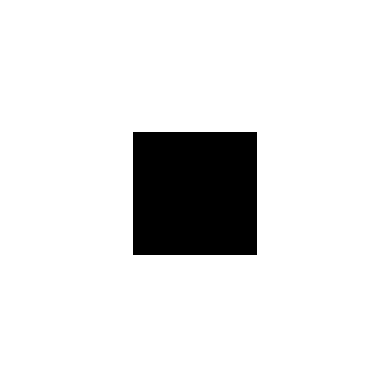

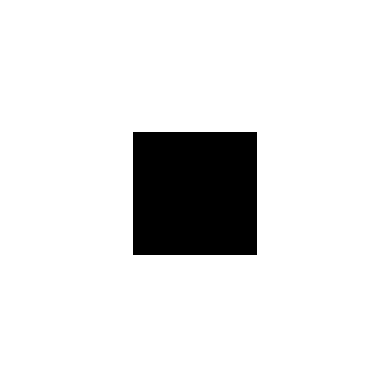

In [2]:
def generate_data(quantity):
    inputs = []
    targets = []
    for i in range(quantity):
        label = random.randint(0, 3)
        
        if label == 0:
            # X shape
            img = np.array([[1, 0, 1],
                            [0, 1, 0],
                            [1, 0, 1]]).flatten()
        elif label == 1:
            # O shape (outline of a square)
            img = np.array([[1, 1, 1],
                            [1, 0, 1],
                            [1, 1, 1]]).flatten()
        elif label == 2:
            # + shape
            img = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]]).flatten()
        elif label == 3:
            # - shape
            img = np.array([[0, 0, 0],
                            [1, 1, 1],
                            [0, 0, 0]]).flatten()

        inputs.append(img)
        targets.append(label)
    
    return np.array(inputs), np.array(targets)

    
class BabyDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        data,targets = dataset
        self.data = data
        self.targets = targets

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        slice_i = torch.tensor(np.take(self.data, indices=idx, axis=0), dtype=torch.float32)
        target = self.targets[idx]
        return slice_i,target

def show_bw_image(img_array):
    plt.imshow(img_array.reshape(3,3), cmap='gray')
    plt.axis('off')
    plt.show()


train_dataset = BabyDataset(generate_data(100))
val_dataset = BabyDataset(generate_data(30))
test_dataset = BabyDataset(generate_data(10))
show_bw_image(train_dataset[0][0])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)
show_bw_image(next(iter(train_loader))[0][0])

tensor([0., 0., 0., 1., 1., 1., 0., 0., 0.])
input_image 3


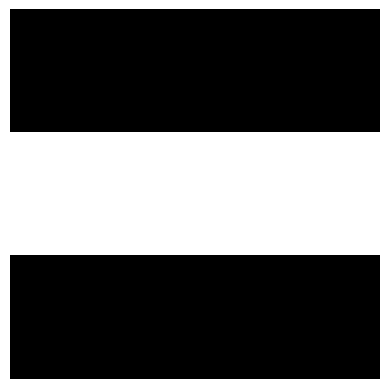

predicted_image tensor([3])


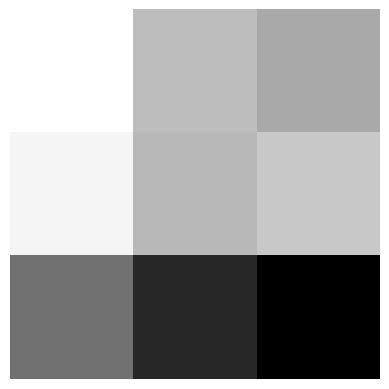

generating image for number 0
(9,)


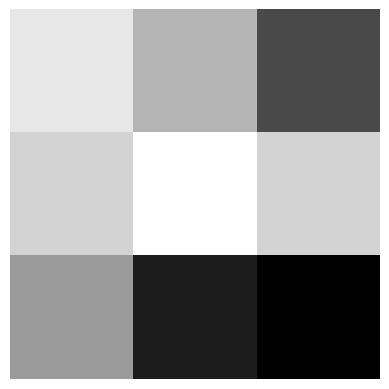

epoch 0,accuracy 0.5333333333333333, validation loss 1.6003614028294881, train loss(1.6274389120248647
epoch 1,accuracy 1.0, validation loss 1.5636685252189637, train loss(1.5826218586701613
epoch 2,accuracy 1.0, validation loss 1.5278823733329774, train loss(1.543685372059162
epoch 3,accuracy 1.0, validation loss 1.487887152036031, train loss(1.5047831627038808
epoch 4,accuracy 1.0, validation loss 1.442042867342631, train loss(1.4615800013908973
epoch 5,accuracy 1.0, validation loss 1.389399274190267, train loss(1.4155043822068434
epoch 6,accuracy 1.0, validation loss 1.3332393924395243, train loss(1.3598072528839111
epoch 7,accuracy 1.0, validation loss 1.2748604496320088, train loss(1.3031969620631292
epoch 8,accuracy 1.0, validation loss 1.2183163007100424, train loss(1.2463261439250066
epoch 9,accuracy 1.0, validation loss 1.1628605802853902, train loss(1.1908292862085195
epoch 10,accuracy 1.0, validation loss 1.113459014892578, train loss(1.1398264261392446
epoch 11,accuracy 1.0

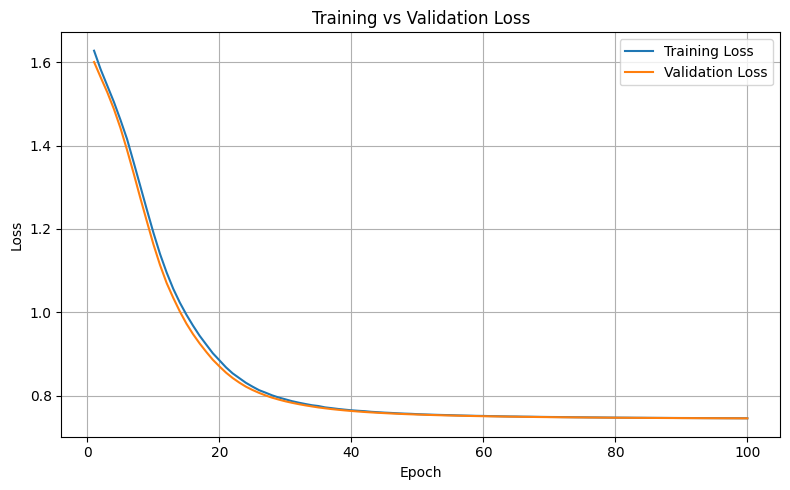

tensor([0., 0., 0., 1., 1., 1., 0., 0., 0.])
input_image 3


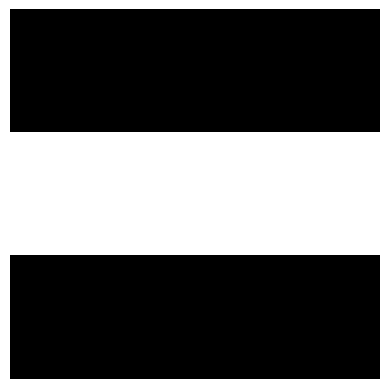

predicted_image tensor([3])


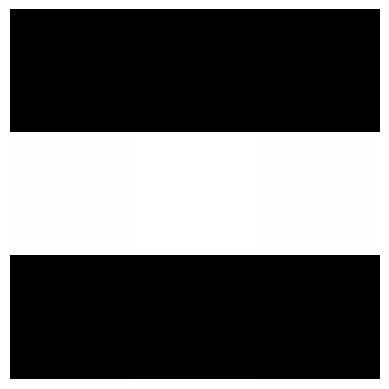

generating image for number 0
(9,)


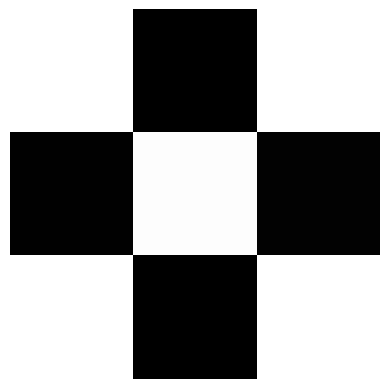

In [3]:
class simple_autoencoder(torch.nn.Module):
    def __init__(self):
        super(simple_autoencoder, self).__init__()

        self.enc_fc1 = nn.Linear(9, 64)
        self.enc_fc2 = nn.Linear(64, 4)

        self.dec_fc1 = nn.Linear(4, 64)
        self.dec_fc2 = nn.Linear(64,9)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encoder(self,input):
        # print("shape 1",input.shape)
        # x = input.view(-1,9)
        # print("shape 2",x.shape)
        x = self.relu(self.enc_fc1(input))
        # print("shape 3",x.shape)
        latent = self.sigmoid(self.enc_fc2(x))
        # print("shape 5",x.shape)
        return latent

    def decoder(self, latent):
        # print("shape -1",x.shape)
        x = self.relu(self.dec_fc1(latent))# now at (n,32,3,3)
        # print("shape -3",x.shape)
        x = self.sigmoid(self.dec_fc2(x))# now at (n,32,6,6)
        # print("shape -4",x.shape)
        return x
        
    def forward(self, input):
        
        latent = self.encoder(input)
        # pred = self.latent_prediction(latent)
        x = self.decoder(latent)

        return x,latent

    def generate_image_from_one_hot(self,latent):
        return self.decoder(latent)

def visualise_prediction(model, batch,index = 0):
    data,label = batch
    print(data)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking for efficiency
        input = torch.tensor(np.expand_dims(data, axis=0), dtype=torch.float32)
        # input = data
        # print("input",input.shape,input)
        predicted_output,pred_label = model(input)
        pred_label = pred_label.argmax(dim=1)
        predicted_output = predicted_output.numpy()[0]
        # print("pred",predicted_output.shape,predicted_output)
        print("input_image", label)
        show_bw_image(input)

        print("predicted_image", pred_label)
        show_bw_image(predicted_output)

def generate_image_from_one_hot(model, number = None,one_hot = None):
    if number or number == 0:
            print(f"generating image for number {number}")
            one_hot = [0] * 4
            one_hot[number] = 1
    one_hot = torch.tensor(one_hot, dtype=torch.float32)
    # print("onehot",type(one_hot),one_hot.shape)
    model.eval()
    with torch.no_grad():
        predicted_output = model.generate_image_from_one_hot(one_hot)
        predicted_output = predicted_output.numpy()
        print(predicted_output.shape)
        show_bw_image(predicted_output)
        
def plot_losses(val_losses,train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def Validate(model, val_loader):
    MSE_loss = nn.MSELoss()
    CE_loss = nn.CrossEntropyLoss()
    model.eval()
    losses = []
    correct_guesses = 0
    total_guesses = 0
    with torch.no_grad():
        for batch in val_loader:
            input,target = batch
            one_hot_target = F.one_hot(target, num_classes=4).float()
            output, latent = model(input)
            # print("latent shape",latent.shape)
            # print("latent argax", latent.argmax(axis = 1))
            
            for i, pred in enumerate(latent.argmax(axis = 1)):
                if pred == target[i]:
                    correct_guesses += 1
                total_guesses += 1
            mse_loss = MSE_loss(output, input)
            ce_loss = CE_loss(latent, one_hot_target)
            loss = mse_loss+ce_loss
            losses.append(loss.item())
    # print("total",total_guesses, "correct", correct_guesses)
    return np.mean(losses), (correct_guesses/total_guesses)
    
def Train(model,train_loader, val_loader, epochs,lr):
    MSE_loss = nn.MSELoss()
    CE_loss = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    gradients = []
    epoch_val_losses = []
    epoch_train_losses = []
    epoch_val_accuracies = []
    for epoch in range(epochs):
        model.train()
        losses = []
        for batch in train_loader:
            input,target = batch
            target = F.one_hot(target, num_classes=4).float()
            # print("input",input.shape)
            # print("target", target.shape)
            optimizer.zero_grad() #sets initial gradients to 0 for security purposes
        
            output, latent = model(input)
            # print("latent",latent,"target",target)
            mse_loss = MSE_loss(output, input)
            ce_loss = CE_loss(latent, target)
            loss = mse_loss+ce_loss
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
        val_loss,val_accuracy = Validate(model, val_loader)
        epoch_val_accuracies.append(val_accuracy)
        epoch_val_losses.append(val_loss)
        epoch_train_losses.append(np.mean(losses))
        # print('epoch {}, loss {}'.format(epoch, loss.item()))
        print(f'epoch {epoch},accuracy {val_accuracy}, validation loss {epoch_val_losses[-1]}, train loss({epoch_train_losses[-1]}')

    plot_losses(epoch_val_losses,epoch_train_losses)  


    
learning_rate = 0.001
num_epochs = 100

model = simple_autoencoder()
visualise_prediction(model,val_dataset[random.randrange(10)])
generate_image_from_one_hot(model,number = 0)
Train(model,train_loader, val_loader, num_epochs,learning_rate)
visualise_prediction(model,val_dataset[random.randrange(10)])
generate_image_from_one_hot(model,number = 0)


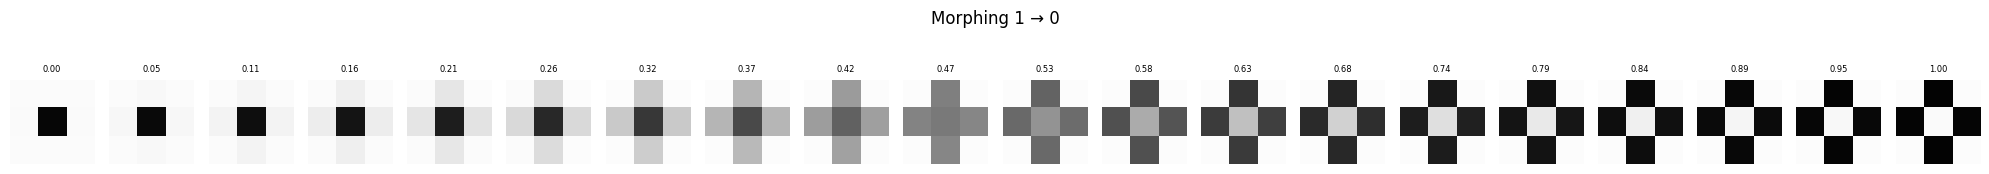

In [7]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def morph_in_grid(model, class_from, class_to, steps=20):
    # One-hot vectors
    vec_from = torch.zeros(4)
    vec_from[class_from] = 1.0

    vec_to = torch.zeros(4)
    vec_to[class_to] = 1.0

    fig, axes = plt.subplots(1, steps, figsize=(steps, 2))

    for i in range(steps):
        alpha = i / (steps - 1)
        interp = (1 - alpha) * vec_from + alpha * vec_to
        with torch.no_grad():
            output = model.decoder(interp.unsqueeze(0)).numpy().reshape(3, 3)
        axes[i].imshow(output, cmap='gray', vmin=0, vmax=1)
        axes[i].axis('off')
        axes[i].set_title(f"{alpha:.2f}", fontsize=6)

    fig.suptitle(f"Morphing {class_from} → {class_to}")
    plt.tight_layout()
    plt.show()

morph_in_grid(model, class_from=1, class_to=0)


tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.])
input_image 0


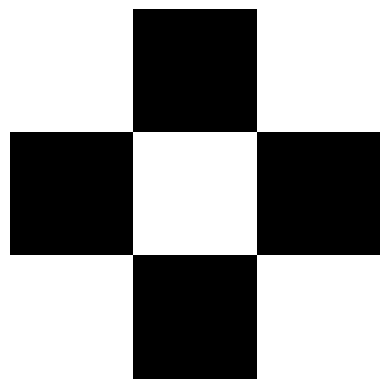

predicted_image tensor([0])


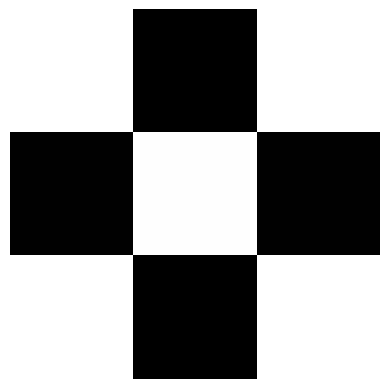

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.])
input_image 0


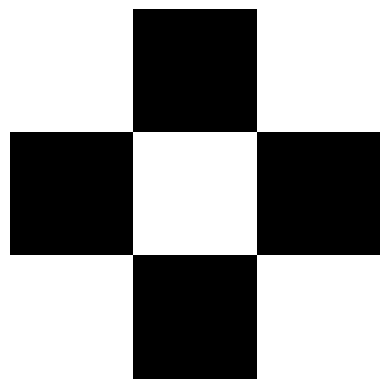

predicted_image tensor([0])


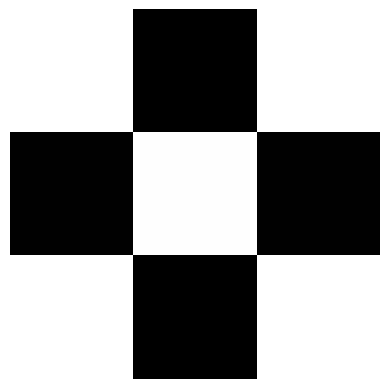

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.])
input_image 1


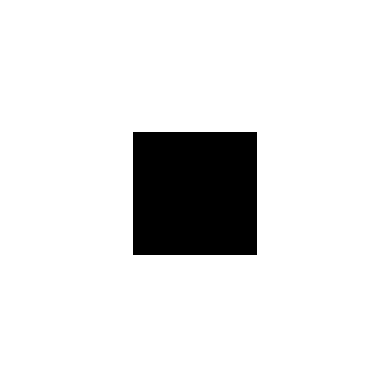

predicted_image tensor([1])


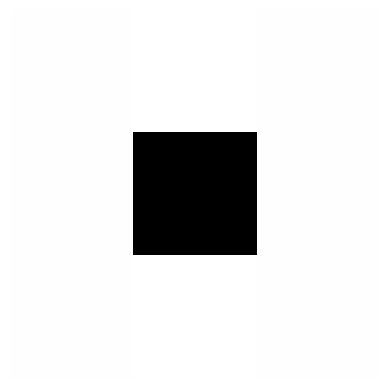

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.])
input_image 1


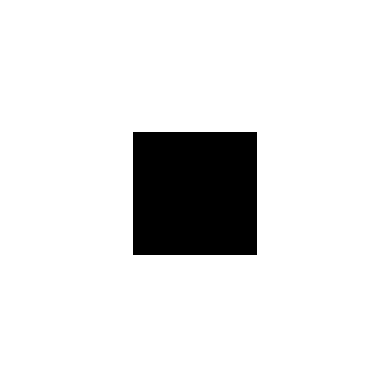

predicted_image tensor([1])


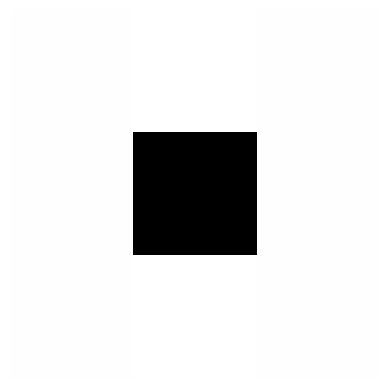

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.])
input_image 0


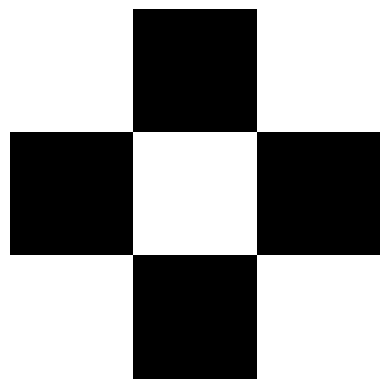

predicted_image tensor([0])


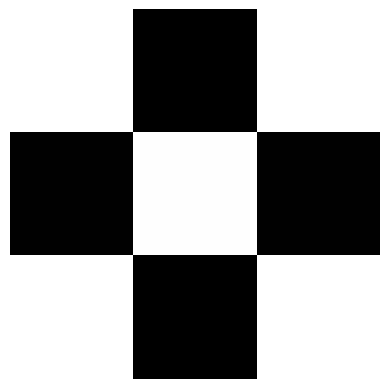

tensor([0., 0., 0., 1., 1., 1., 0., 0., 0.])
input_image 3


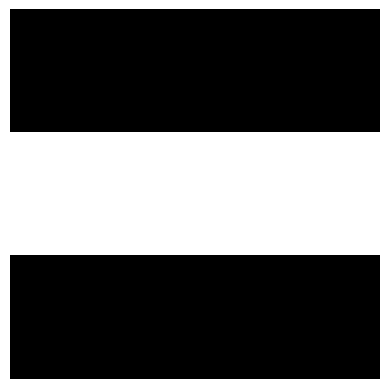

predicted_image tensor([3])


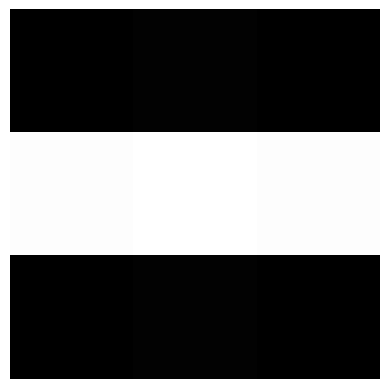

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.])
input_image 1


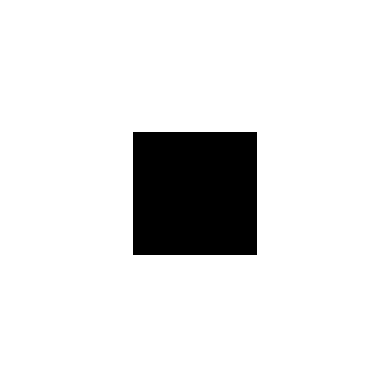

predicted_image tensor([1])


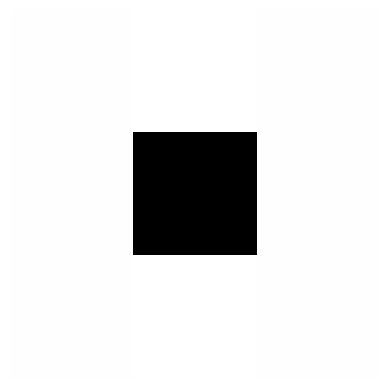

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.])
input_image 0


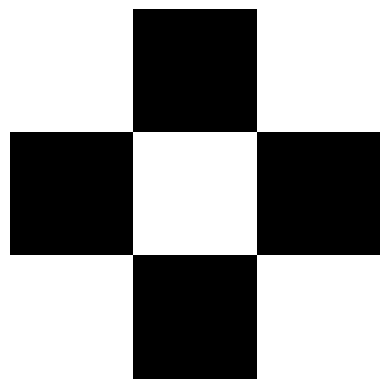

predicted_image tensor([0])


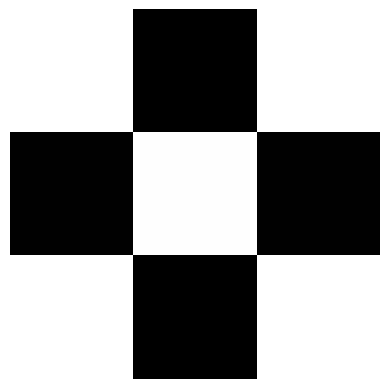

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.])
input_image 0


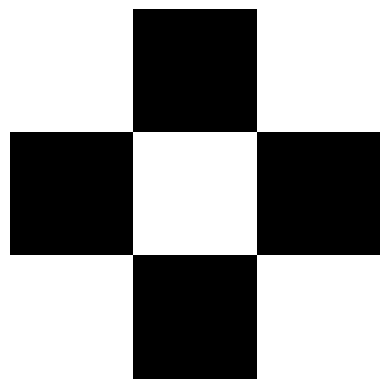

predicted_image tensor([0])


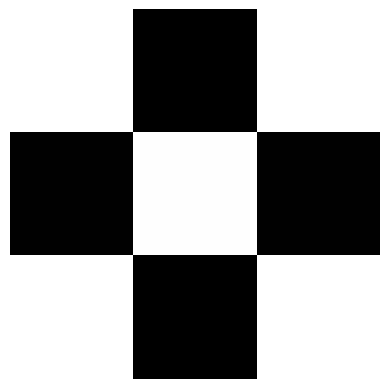

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.])
input_image 0


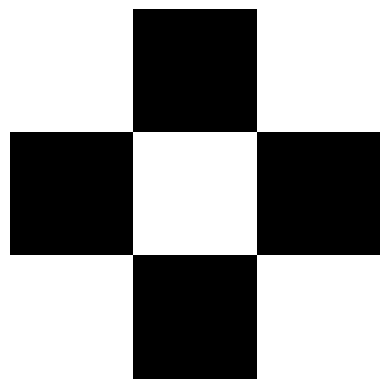

predicted_image tensor([0])


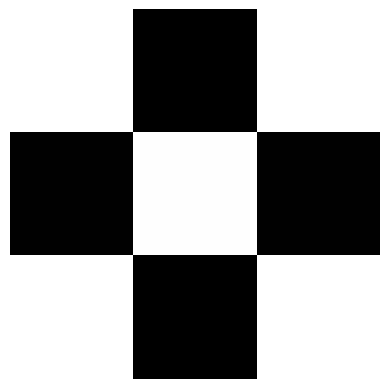

In [43]:
import random

indices = random.sample(range(len(val_dataset)), 10)
for i in indices:
    # print(i)
    # print(val_dataset[i])
    visualise_prediction(model, val_dataset[i])

generating image for number 9


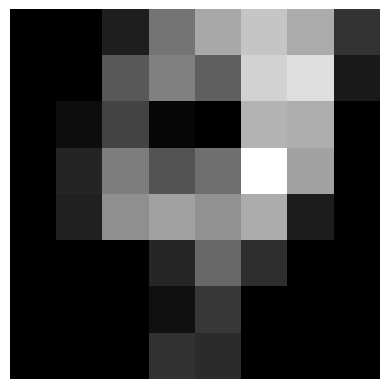

In [89]:
generate_image_from_one_hot(model,number =9)
